In [8]:
import gensim.downloader as api

# Load the GloVe model
model = api.load("glove-wiki-gigaword-200")


[==================================================] 100.0% 252.1/252.1MB downloaded


In [9]:
# Checking similarity between words
similarity_man_woman = model.similarity('man', 'woman')
similarity_chair_throne = model.similarity('chair', 'throne')
similarity_water_baby = model.similarity('water', 'baby')

print("Similarity between 'Man' and 'Woman':", similarity_man_woman)
print("Similarity between 'Chair' and 'Throne':", similarity_chair_throne)
print("Similarity between 'Water' and 'Baby':", similarity_water_baby)


Similarity between 'Man' and 'Woman': 0.75200856
Similarity between 'Chair' and 'Throne': 0.24691008
Similarity between 'Water' and 'Baby': 0.35296535


In [10]:
# Finding the analogies
king_to_man = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)[0][0]
princess_to_woman = model.most_similar(positive=['princess', 'man'], negative=['woman'], topn=1)[0][0]
woman_to_child = model.most_similar(positive=['woman', 'child'], negative=['adult'], topn=1)[0][0]

print("King is to Man as Woman is to:", king_to_man)
print("Princess is to Woman as Man is to:", princess_to_woman)
print("Woman is to child as child is to adult:", woman_to_child)


King is to Man as Woman is to: queen
Princess is to Woman as Man is to: prince
Woman is to child as child is to adult: mother


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

# Load the dataset with encoding specified
data = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')

# Display the first few rows to verify successful loading
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
# Adjust column names and retain only the essential columns
data = data.rename(columns={'v1': 'label', 'v2': 'text'})[['label', 'text']]


# Display the first few rows to verify successful loading
print(data.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [20]:
!pip install scikit-plot


In [22]:
!pip install scipy==1.7.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 91.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.7.3 which is incompatible.
arviz 0.20.0 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
a

In [5]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt

In [6]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def text_process(text):
    text = re.sub('[^A-Za-z]+', ' ', text.lower())
    text = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(text)

data['text'] = data['text'].apply(text_process)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.33, random_state=42)


In [8]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [9]:
nb = MultinomialNB()
nb.fit(X_train_vect, y_train)


MultinomialNB()

Naive Bayes Accuracy: 0.9799
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       0.99      0.86      0.92       252

    accuracy                           0.98      1839
   macro avg       0.98      0.93      0.95      1839
weighted avg       0.98      0.98      0.98      1839



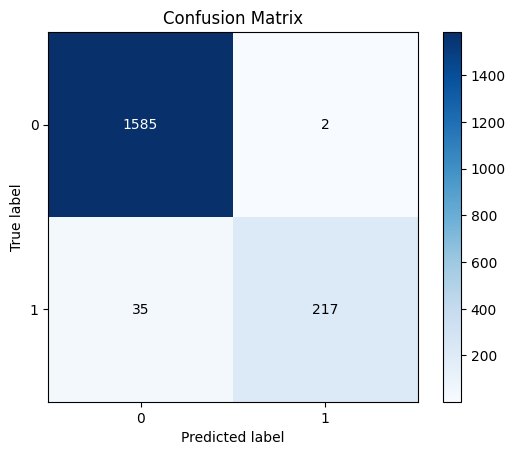

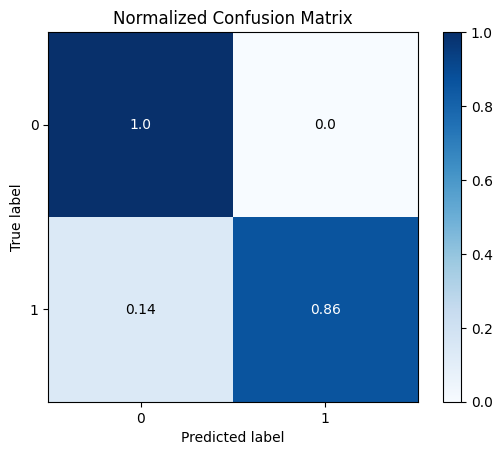

In [10]:
# Predict
y_pred = nb.predict(X_test_vect)

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()


In [11]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(nb, vectorizer.transform(data['text']), data['label'], cv=5)
print(f'Cross-Validation Scores: {cv_scores}')


Cross-Validation Scores: [0.87623318 0.88520179 0.88420108 0.88868941 0.8940754 ]
